# Download all xen releases

In [1]:
def xen_releases(url:str, output_file:str):
    
    import requests
    from bs4 import BeautifulSoup
    
    #List containing all link in the root url 
    root_links = []
    #url = 'https://xenproject.org/xen-project-archives/'
    #Get all url 
    reqs = requests.get(url)
    soup = BeautifulSoup(reqs.text, 'html.parser')

    for link in soup.find_all('a'):
        if not "https" in link.get('href'):
            pass
        else: 
            #if is_downloadable(link.get('href')):
            root_links.append(link.get('href'))
    #Prefix of xen releases only
    prefix = "https://xenproject.org/downloads/xen-project-archives/xen-project"
    
    #url list of xen releases
    xen_releases = [link for link in root_links if prefix in link]
    
    #url releases series list
    release_series=[link for link in xen_releases if len(link.rsplit('/'))<=7]
    
    #url of release of all series
    all_releases = [link for link in xen_releases if len(link.rsplit('/'))>7]
    
    #Link prefix to download releases
    prefix_download_link = "https://downloads.xenproject.org/release/xen/"
    
    #Iterate over all_releases, extract only the release number and combine it with the prefix link and store 
    # in a file
    
    for link in all_releases:
        xen_release = link.rsplit("/", 2)
        long_num = len('.'.join(xen_release[1].rsplit('-')[2:]))
        if long_num >=5:
            xen_release_num = '.'.join(xen_release[1].rsplit('-')[2:])
        else:
            xen_release_num = '.'.join(xen_release[1].rsplit('-')[1:])
            
        url_download_release = "https://downloads.xenproject.org/release/xen/"+xen_release_num+"/xen-"+xen_release_num+".tar.gz"        
        with open(output_file, 'a') as f:
            f.write("\n")  
            f.write(url_download_release)
            

In [2]:
output_file = "/home/wilson/Hardware_virtualization/xen_release"
url_xen = "https://xenproject.org/xen-project-archives/"

In [3]:
xen_releases(url_xen, output_file)

# Xen Feature graphe sorted by release

In [121]:
# #Librairies
# import os
# from glob import glob
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import matplotlib
# import matplotlib as mpl
# from matplotlib.colors import ListedColormap, LinearSegmentedColormap
# import seaborn as sns 

In [122]:
# #Load file con
# path = "/home/wilson/Hardware_virtualization/xen_feature_release.csv"
# df_releases_xen = pd.read_csv(path)

In [9]:
def plot_xen_feature_releases(input_file_path, output_file_path):
    
    
    #Libraries
    import os
    from glob import glob
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import matplotlib
    import matplotlib as mpl
    from matplotlib.colors import ListedColormap, LinearSegmentedColormap
    import seaborn as sns 
    
    #Read file
    df_releases_xen = pd.read_csv(input_file_path)
    
    # Remove xen prefix in each release
    index = df_releases_xen['release']
    index = [elt.rsplit('-')[1] for elt in index]
    
    #Update release name
    df_releases_xen['release']=index
    
    #Set release column as index
    df_releases_xen=df_releases_xen.set_index('release')
    
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(12, 10))
    font = {'family' : 'serif',
            'weight' : 'normal',
            'size'   : 6}

    matplotlib.rc('font', **font)

    colors = ["lightgray", (0.286,0.313, 0.341)] 
    cmap = LinearSegmentedColormap.from_list('Custom', colors, len(colors))
    
    ax = sns.heatmap(df_releases_xen.T, cmap=cmap, cbar_kws={"shrink": .1},
                      linewidths=.05, square=True)
    ax.set_aspect(1.5)
    #ax.tick_params(labelrotation=0)

    # Set the colorbar labels
    colorbar = ax.collections[0].colorbar
    colorbar.set_ticks([0,1])
    colorbar.set_ticklabels(['0', '1'])
    
    # Réduire la taille de la police sur l'axe Y
    #ax.yaxis.set_tick_params(labelsize=5.5)
    plt.xlabel("Xen releases")
    plt.ylabel("Hardware features")
    plt.xticks(rotation=90)
    #ax.set_xticks(rot)
    plt.tight_layout()
    #Export to pdf format
    plt.savefig(output_file_path+"/"+"xen_features.pdf", format="pdf", bbox_inches="tight")

    #Export to svg format
    plt.savefig(output_file_path+"/"+"xen_features.svg", format="svg", bbox_inches="tight")
    #plt.show()

    

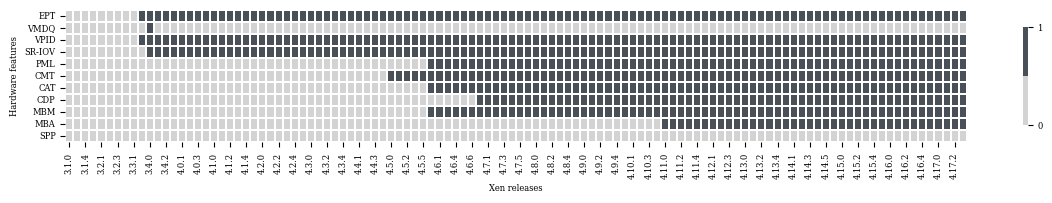

In [10]:
# #Load file
path = "xen_feature_release.csv"
plot_xen_feature_releases(path, "/home/wilson/Hardware_evolution/hardware_evol_hypervisor")

# Intel processor for each feature

All intel processor are in Scrape_intel_processor.ipynb

**Get first intel server to incorporate each feature**

<font color=blue>***Extended Page Tables***</font>

In [1]:
# import os
# import numpy as np
# import pandas as pd
# import requests
# from bs4 import BeautifulSoup

In [2]:
# table = pd.read_html("https://en.wikipedia.org/wiki/List_of_Intel_Xeon_processors_(Nehalem-based)")
# len(table)

14

In [95]:
def ept_processor_first_release(link, output_folder):
    """Get the list of the firsts Intel's server processor  that supports EPT
        
        Args:
            link (str) : The link of page containing intel processor
            output_folder (str) : output folder to store dataframe as csv
        
        Returns:
        df_ept_intel_cpu (Dataframe) : The dataframe containing processors 
    """
    
    # import 
    import numpy as np
    import pandas as pd
    
    df_ept_intel_cpu = pd.read_html(link)
    
    df_ept_intel_cpu = pd.DataFrame()
    
    for i in range(10):
        df_ept_intel_cpu = pd.concat([df_ept_intel_cpu, table[i]], ignore_index=False)
    
    #Row container some unnessary row
    patternDel = "Core"
    filters = df_ept_intel_cpu['Model number'].str.contains(patternDel)
    df_ept_intel_cpu = df_ept_intel_cpu[~filters]
    df_ept_intel_cpu = df_ept_intel_cpu.reset_index(drop=True)
    
    #export to csv
    df_ept_intel_cpu.to_csv(output_folder+"/"+"ept_intel.csv")
    
    
    return df_ept_intel_cpu
    

In [2]:
# output_folder = "/home/wilson/Hardware_virtualization"
# link = "https://en.wikipedia.org/wiki/List_of_Intel_Xeon_processors_(Nehalem-based)"
# ept=ept_processor_first_release(link, output_folder)

In [3]:
# ept

<font color=blue>***Virtual processor Identification***</font>

In [160]:
#Firsts Intel's processors to incorporate VPID
vpid_link = "https://www.intel.fr/content/www/fr/fr/content-details/803591/dual-core-intel-r-xeon-r-processor-5100-3000-series-and-quad-core-intel-r-xeon-r-processor-5300-\
pcn-107455-01-order-code-s-spec-mm-change-correcting-boxed-woodcrest-3-ghz-product-information-reason-for-revision-correcting-boxed-woodcrest-3.html"

#Link of some processor
vpid_family = "https://www.techpowerup.com/cpu-specs/#Woodcrest"

<font color=blue>***Code Data and Prioritization***</font>

In [5]:
def cdp_processor_first_release(link, output_folder):
    """Get the list of the firsts Intel's server processor  that supports CDP
        
        Args:
            link (str) : The link of page containing intel processor
            output_folder (str) : output folder to store dataframe as csv
        
        Returns:
        df_cdp_intel_cpu (Dataframe) : The dataframe containing processors 
    """
    
    # import 
    import requests
    from bs4 import BeautifulSoup
    
    reqs = requests.get(link)
    soup = BeautifulSoup(reqs.text, 'html.parser')
    
    table = soup.find('table', attrs={'id': "product-table"})
    table_data = table.find_all('tr')

    table_headings = []

    for th in table_data[0].find_all('th'):
        table_headings.append(th.text)
    table_headings = [head_elt.replace('\n','').strip() for head_elt in table_headings]
    
    df_cdp_intel_cpu = pd.DataFrame(columns=table_headings)
    
    # Create a for loop to fill df
    for j in table_data[1:]:
        row_data = j.find_all('td')
        row = [i.text.replace('\n','').strip() for i in row_data]   
        length = len(df_cdp_intel_cpu)
        df_cdp_intel_cpu.loc[length] = row
    
      #export to csv
    df_cdp_intel_cpu.to_csv(output_folder+"/"+"cdp_intel.csv")
    
    return df_cdp_intel_cpu